# Data Visualization

This notebook uploads the raw data of the log of the Radius of Gyration squared ($R_g^2$) for coarse-grained polymers of different chain lengths ($N$) under different solvent qualities (parameterized by $\alpha$). The resulting figures are Fig. S1 in a publication under review (this will be updated when published).

# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Load the data

In [2]:
df = pd.read_csv('../data/rgmaindata.csv')
dfout = pd.read_csv('../data/rgoutlierdata.csv')

dfall = pd.concat([df, dfout], axis=0)

# Set up the plotting settings

In [3]:
cmap = sns.color_palette("colorblind")
markers = ['o', 'v', 'p', '^', 'h', '<', 's', '>']

# Plot the data as a function of N

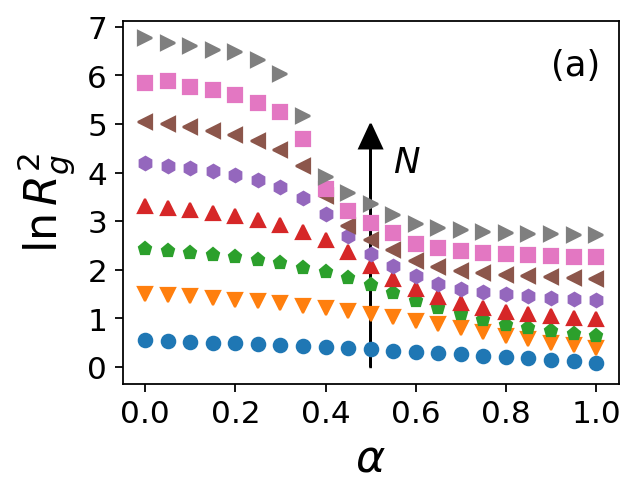

In [4]:
figure(figsize=(4, 3), dpi=160)

setlist = []
for i in range(8):

    N = int(2**(i+3))
    setlist.append(dfall[np.isclose(dfall['log N'], np.log(N))])

    plt.plot(setlist[i]['lambda'], setlist[i]['log Rg,mean'], markers[i])


plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'$\ln R_g^2$', fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.text(.9, 6, '(a)', fontsize=16)
plt.arrow(.5, 0, 0, 5, length_includes_head=True,
          head_width=.05, head_length=.5, color='black')
plt.text(.55, 4, r'$N$', fontsize=16)

plt.savefig('alphadata.pdf', bbox_inches='tight')
plt.show()

# Plot the data as a function of $\alpha$

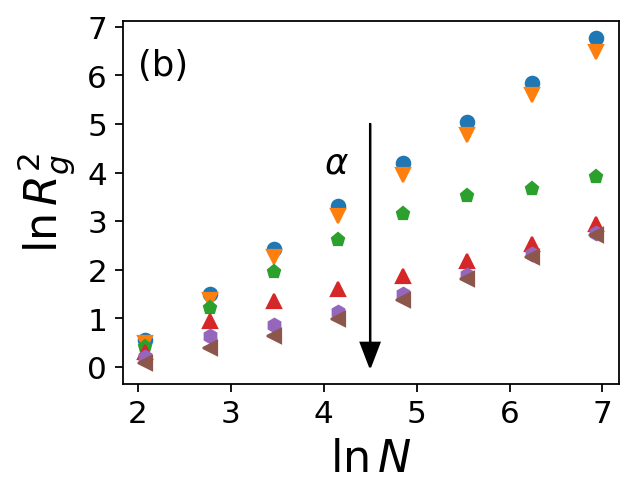

In [5]:
figure(figsize=(4, 3), dpi=160)

setlist = []
for i in range(6):

    l = round(i*.2, 2)
    setlist.append(dfall[dfall['lambda'] == l])

    plt.plot(setlist[i]['log N'], setlist[i]['log Rg,mean'], markers[i])


plt.xlabel(r'$\ln N$', fontsize=20)
plt.ylabel(r'$\ln R_g^2$', fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.text(2, 6, '(b)', fontsize=16)

plt.arrow(4.5, 5, 0, -5, length_includes_head=True,
          head_width=.2, head_length=.5, color='black')
plt.text(4, 4, r'$\alpha$', fontsize=16)

plt.savefig('Ndata.pdf', bbox_inches='tight')
plt.show()